In [1]:
import pandas as pd
import numpy as np
import os


path = r"../../results/popularity_results/yes_popular/k=10_p=5_prompt=zero_level=4_model=gpt_aux=True_evalstyle=weighted_select=stratified_explain=False/result_1690844215"

data = pd.read_csv(os.path.join(path, "metrics.csv"))
novelty = pd.read_csv(os.path.join(path, "novelty.csv")).drop("uid", axis=1)
data["novelty"] = novelty
data["popular"] = np.ones(data.shape[0])

data.to_csv(os.path.join(path, "metrics_e.csv"), index=False)

In [3]:
import glob

full_data = None
for path in glob.iglob("../../results/popularity_results/*/*/*/metrics_e.csv"):
    with open(path, "r") as f:
        if not isinstance(full_data, pd.DataFrame):
            full_data = pd.read_csv(path)
        else:
            new_data = pd.read_csv(path)
            full_data = pd.concat((full_data, new_data), axis=0)
            
    full_data = full_data.drop(full_data.filter(regex="_\d").columns, axis=1)
    
full_data.to_csv("popularity_results.csv", index=False)

In [116]:
import json
from collections import Counter

def get_popular_counts(path: str) -> list:
    with open(path) as f:
        titles = []
        for line in f:
            dic = json.loads(line).values()
            titles.append(list(dic)[0])
            
    all_count = Counter()
    for user_recs in titles:
        all_count.update(user_recs)
        
    names, freqs = zip(*all_count.items())

    sort_indices = np.argsort(freqs)[::-1]
    sort_names = np.array(names)[sort_indices]
    sort_freqs = np.array(freqs)[sort_indices]
    
    return sort_names, sort_freqs

names_nopop, freqs_nopop = get_popular_counts(r"../../results/popularity_results/no_popular/k=10_p=5_prompt=zero_level=4_model=gpt_aux=True_evalstyle=weighted_select=stratified_explain=False/result_1690846799/predicted_titles.jsonl")
names_yespop, freqs_yespop = get_popular_counts(r"../../results/popularity_results/yes_popular/k=10_p=5_prompt=zero_level=4_model=gpt_aux=True_evalstyle=weighted_select=stratified_explain=False/result_1690717715/predicted_titles.jsonl")

In [18]:
import seaborn as sns
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [55]:
names, freqs = zip(*all_count.items())

sort_indices = np.argsort(freqs)[::-1]
sort_names = np.array(names)[sort_indices]
sort_freqs = np.array(freqs)[sort_indices]

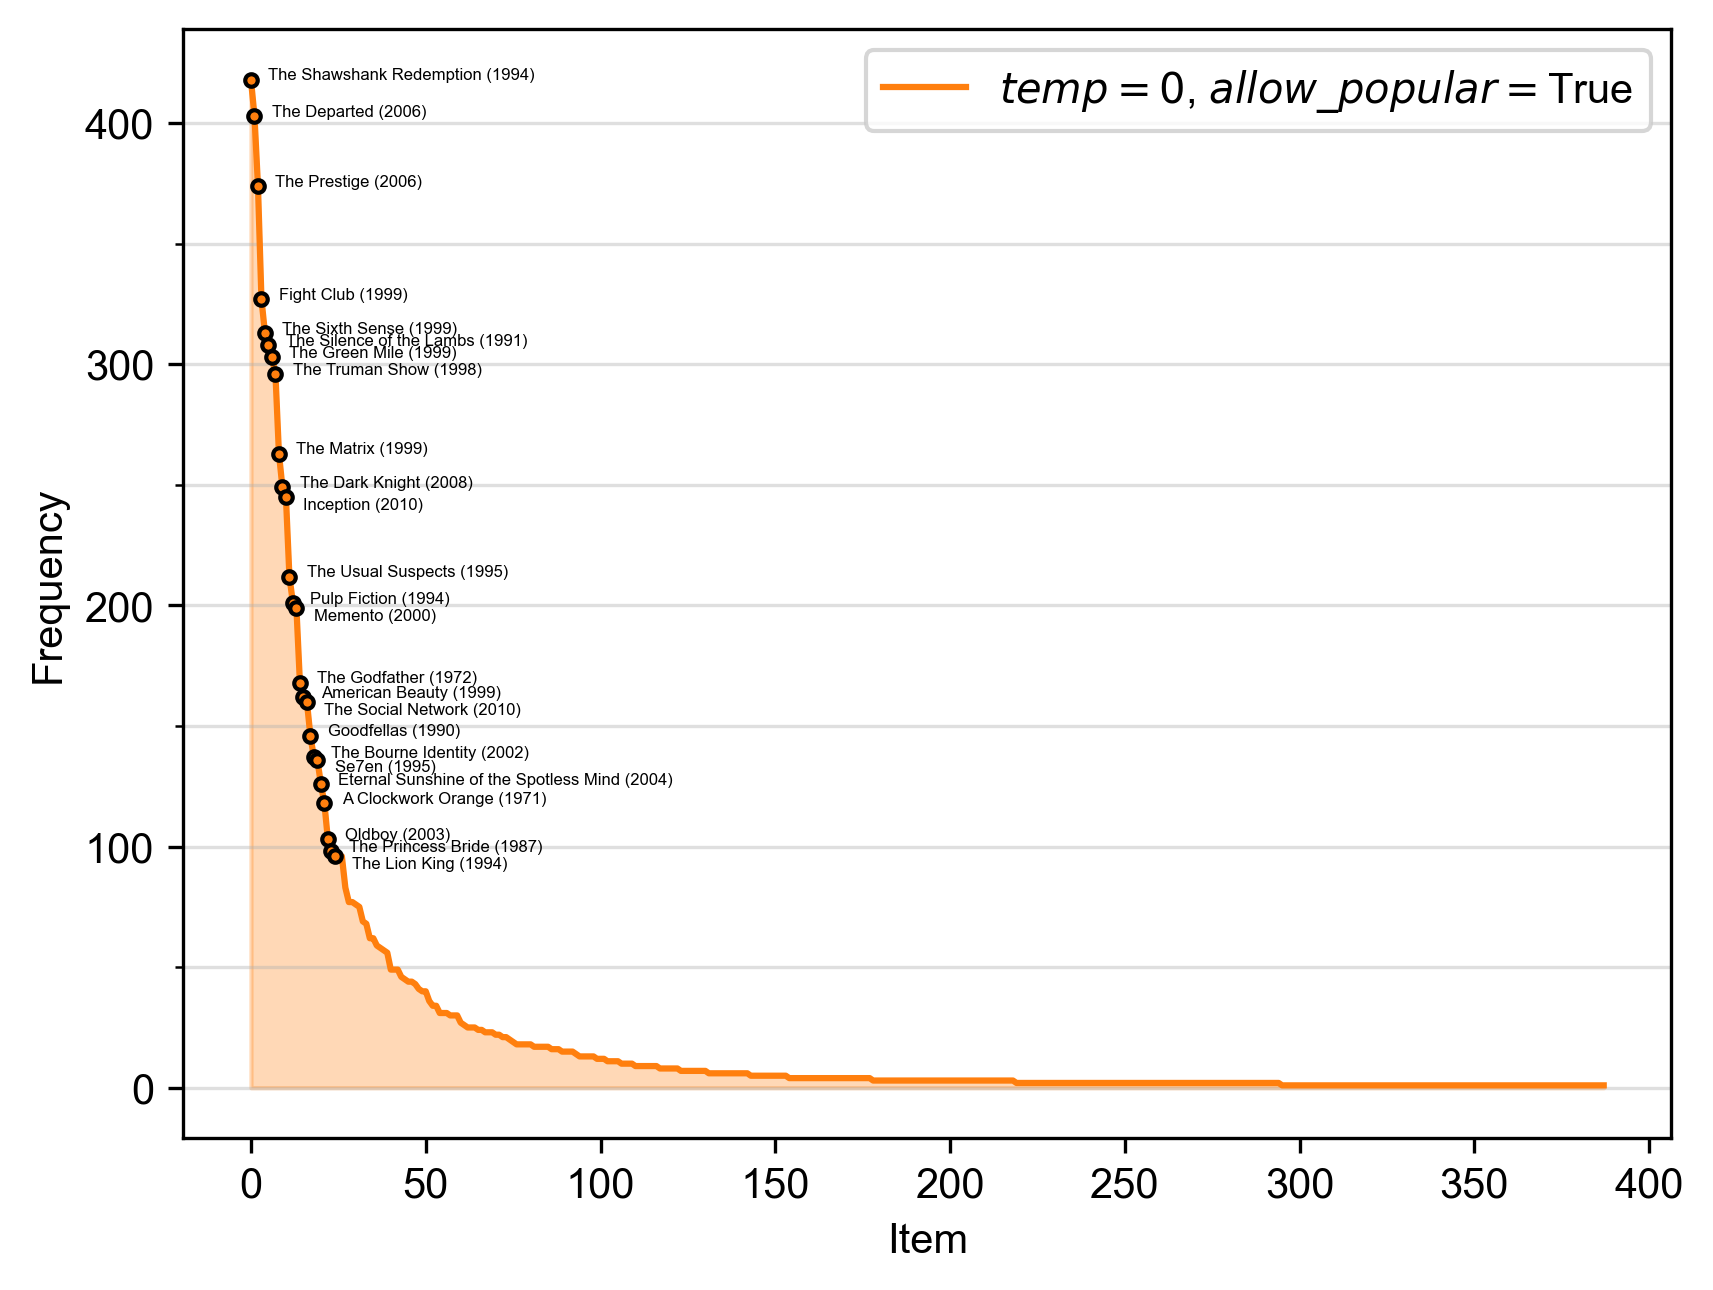

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

x = np.arange(0, len(freqs_yespop))

plt.plot(freqs_yespop, color="tab:orange", label="$temp=0$, $allow\_popular=$True")
plt.fill_between(x, freqs_yespop, alpha=0.3, color="tab:orange")

amount = 25
x_top15 = np.arange(0, amount)
plt.scatter(x_top15, freqs_yespop[:amount], color="tab:orange", marker=".", edgecolor="black", zorder=2)

   
for i in x_top15:
    if i > 0 and (sort_freqs[i-1] - sort_freqs[i]) < 5:
        ytext = sort_freqs[i] - 5
    else:
        ytext = sort_freqs[i]
        
    xy = (i, sort_freqs[i])
    xytext = (i+5, ytext)
  
    plt.annotate(sort_names[i], xy, xytext, fontsize=4)
    
#plt.plot(sortey2, color=colors[1], label="temp=1, prompt_popular=no")

plt.xlabel("Item")
plt.ylabel("Frequency")
#plt.title("Item Recommendation Frequency\nAcross 9,000 Recommendations", fontweight="bold")
plt.legend()
plt.yticks(np.arange(0, 450, 50), minor=True)
plt.grid(axis="y", which="both", alpha=0.4)
plt.savefig("req_frequency.pdf", bbox_inches="tight")
plt.show()

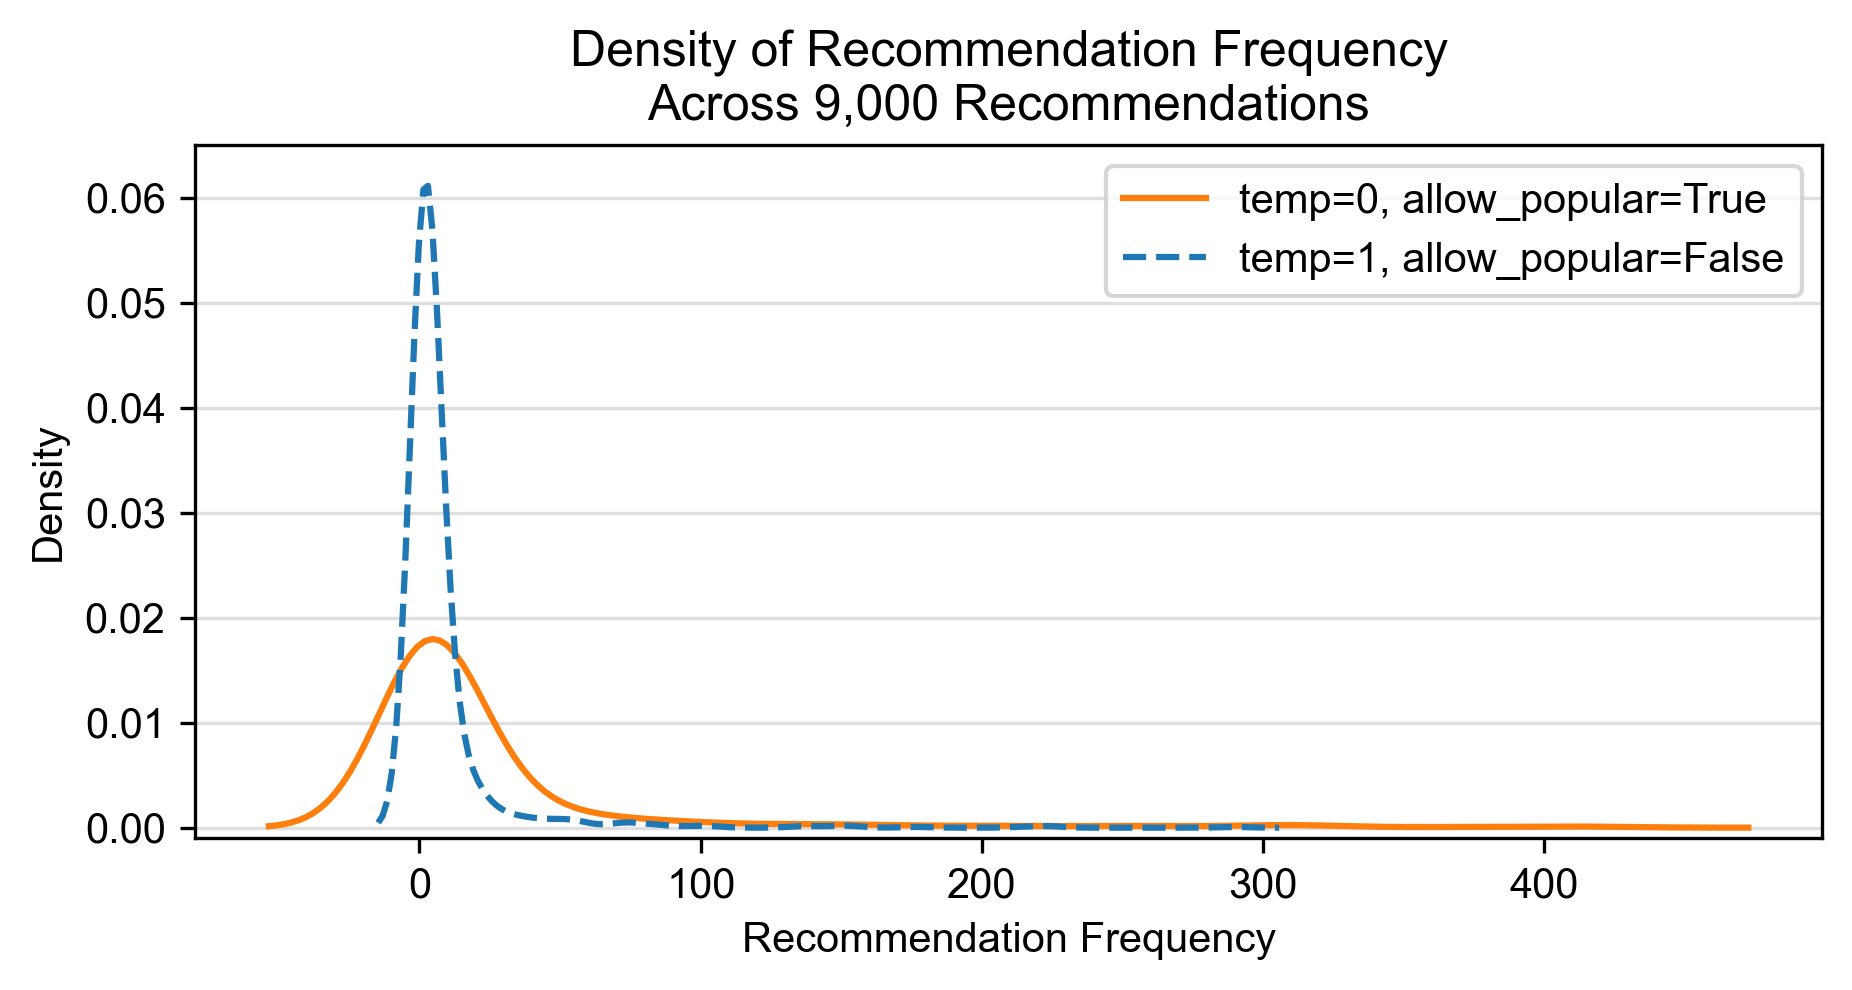

In [168]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.figure(figsize=(7,3))
x = np.arange(0, len(freqs_yespop))

sns.kdeplot(freqs_yespop, color="tab:orange", label="temp=0, allow_popular=True")
sns.kdeplot(freqs_nopop, color="tab:blue", label="temp=1, allow_popular=False", ls="--")
#plt.fill_between(x, sortey, alpha=0.3, color=colors[1])
#plt.xlabel("Item")
plt.ylim(-0.001, 0.065)
plt.xlabel("Recommendation Frequency")
plt.ylabel("Density")
plt.title("Density of Recommendation Frequency\nAcross 9,000 Recommendations")
plt.legend(loc="best")
plt.grid(axis="y", alpha=0.4)
plt.savefig("pop_kde_compare.pdf", bbox_inches="tight")
plt.show()